In [290]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import FreqDist
from nltk.stem import WordNetLemmatizer
import spacy
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report,f1_score

In [232]:
#!pip install -U wordcloud
#!pip install -U plotly plotly-express
#!pip install -U spacy
nlp = spacy.load('en_core_web_sm')

In [233]:
# Importing the training dataset
DATASET_COLUMNS=['id','label','tweet']
df_train = pd.read_csv('https://raw.githubusercontent.com/prateekjoshi565/twitter_sentiment_analysis/master/train_E6oV3lV.csv', names=DATASET_COLUMNS, header=0)
df_train.sample(5)

,id,label,tweet
6506,6507,0,#instagirls i want you on the table -
2955,2956,0,"@ ""take time to do what makes your soul happy by owlashop via @user #quotes #giftideas"""
13713,13714,0,painting in the bathtub!! #paint #aist #smile #fingerpaint #messy #fun #funwithdaddy #bestdad #cheese #love
7269,7270,0,@user cant wait to get back into the studio! days away from getting staed #wecantwait #theintroduction #roxxymontana
26798,26799,0,"every chance i get, i'm in my place....#wine a #fire and perfect #weather!! @user"


In [234]:
#Length of the dataset

print('length of train data is', len(df_train))
df_train.describe()

length of train data is 31962


,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [235]:
# Importing the Testing dataset
DATASET_COLUMNS=['id','tweet']
df_test = pd.read_csv('https://raw.githubusercontent.com/prateekjoshi565/twitter_sentiment_analysis/master/test_tweets_anuFYb8.csv', names=DATASET_COLUMNS,header=0)
df_test.sample(5)

,id,tweet
16307,48270,eah is dying but i'm pretty sure we are going to all kill each other before that happens.
13781,45744,good morning all! last day in the office this week and then back to see the family and friends tomorrow evening!
6618,38581,because i have many reasons to be happy! âð½ï¸ ð #blessed #smile #sunday
3724,35687,"@user @user wow, super disappointed my gov would dignify this loser by attending. was always such a fan... live &amp; learn."
229,32192,@user first @user for @user with our new customer @user #paners #drupa2016 hall 10 stand c13/3


In [236]:
#Length of the dataset

print('length of test data is', len(df_test))

length of test data is 17197


In [237]:
#Check the number of target values
df_train['label'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='label', ylabel='count'>

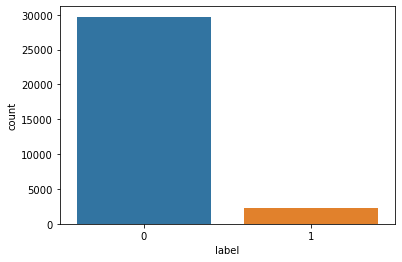

In [238]:
# Plotting the distribution for dataset.
#px.box(df_train, x="label", y="tweet", color="label", title="Distribution of tweets for each label")
sns.countplot(x='label', data=df_train)
# Storing data in lists.
#text, sentiment = list(df_train['tweet']), list(df_train['label'])

In [239]:
fig = px.pie(df_train, names=df_train.label, hole=0.7, title='Tweets Classification',
             height=250, color_discrete_sequence=px.colors.qualitative.T10)
fig.update_layout(margin=dict(t=100, b=40, l=60, r=40), 
                  plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                  title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  )

## Data Preprocesing

In [240]:
# Remove @user from the twwet
def remove_pattern(input_txt):
    r = re.findall(r"@(\w+)", input_txt)
    for i in r:
        input_txt = re.sub(f'@{i}', '', input_txt)      
    return input_txt
df_train['clean_tweet'] = df_train['tweet'].apply(lambda x: remove_pattern(x))
df_train.tail()

,id,label,tweet,clean_tweet
31957,31958,0,ate @user isz that youuu?ðððððððððâ¤ï¸,ate isz that youuu?ðððððððððâ¤ï¸
31958,31959,0,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher,to see nina turner on the airwaves trying to wrap herself in the mantle of a genuine hero like shirley chisolm. #shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw to work is sad,listening to sad songs on a monday morning otw to work is sad
31960,31961,1,"@user #sikh #temple vandalised in in #calgary, #wso condemns act","#sikh #temple vandalised in in #calgary, #wso condemns act"
31961,31962,0,thank you @user for you follow,thank you for you follow


In [241]:
#remove_pattern('@user when a father is dysfunctional and his son is a good')
df_train['tweet'][df_train['label'] == 0]

0                                      @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
1                 @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
2                                                                                                                        bihday your majesty
3                                                     #model   i love u take with u all the time in urð±!!! ðððð
ð¦ð¦ð¦  
4                                                                                                     factsguide: society now    #motivation
                                                                        ...                                                                 
31956                                                                          off fishing tomorrow @user carnt wait first time in 2 years  
31957        

In [242]:
hashtags = []
def hashtag_extract(x):
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

# extracting hashtags from neg/pos tweets
dff_0 = hashtag_extract(df_train['clean_tweet'][df_train['label'] == 0])
dff_1 = hashtag_extract(df_train['clean_tweet'][df_train['label'] == 1])
dff_all = hashtag_extract(df_train['clean_tweet'][df_train['label']])
# unnesting list
dff_0 = sum(dff_0,[])
dff_1 = sum(dff_1,[])
dff_all = sum(dff_all,[])

data_0 = FreqDist(dff_0)
data_0 = pd.DataFrame({'Hashtag': list(data_0.keys()),
                  'Count': list(data_0.values())}).sort_values(by='Count', ascending=False)
data_0[:5]

,Hashtag,Count
0,run,29753
3,getthanked,2244
1,lyft,2244
2,disapointed,2243
33,love,1542


In [243]:
fig = px.bar(data_0[:30], x='Hashtag', y='Count', height=250,
             title='Top 30 hashtags',
             color_discrete_sequence=px.colors.qualitative.T10)
fig.update_yaxes(showgrid=False),
fig.update_xaxes(categoryorder='total descending')
fig.update_traces(hovertemplate=None)
fig.update_layout(margin=dict(t=100, b=0, l=60, r=40), 
                  hovermode="x unified",
                  xaxis_tickangle=300,
                  xaxis_title=' ', yaxis_title=" ",
                  plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                  title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93')
                  )

In [244]:
#!pip install tweet-preprocessor
import preprocessor as p
def preprocess_tweet(row):
    text = row['clean_tweet']
    text = p.clean(text)
    return text

def preprocessing_text(text):
     # Make lowercase
     text = text.str.lower()
     # Remove punctuation
     text = text.str.replace('[^\w\s]', '', regex=True)
     # Remove digits
     text = text.str.replace('[\d]+', '', regex=True)
     return text
pd.set_option('max_colwidth', 500)

df_train['clean_tweet'] = df_train.apply(preprocess_tweet, axis=1)
df_train['clean_tweet'] = preprocessing_text(df_train['clean_tweet'])
df_train.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for credit i cant use cause they dont offer wheelchair vans in pdx
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguide society now


In [245]:
# Removing Stopwords
STOPWORDS = stopwords.words('english')

def cleaning_stopwords(text,STOPWORDS):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_train['clean_tweet'] = df_train['clean_tweet'].apply(lambda text: cleaning_stopwords(text,STOPWORDS))
df_train['clean_tweet'].head()

0            father dysfunctional selfish drags kids dysfunction
1    thanks credit cant use cause dont offer wheelchair vans pdx
2                                                 bihday majesty
3                                          love u take u time ur
4                                             factsguide society
Name: clean_tweet, dtype: object

In [246]:
a = df_train['clean_tweet'].str.cat(sep=' ')
words = word_tokenize(a)
word_dist = FreqDist(words)
dff = pd.DataFrame(word_dist.most_common(), 
                    columns=['Word', 'Frequency'])
dff['Word_Count'] = dff.Word.apply(len)
dff[:5]

,Word,Frequency,Word_Count
0,day,2042,3
1,amp,1615,3
2,happy,1576,5
3,love,1206,4
4,im,1149,2


In [247]:
fig = px.histogram(dff[:20], x='Word', y='Frequency', height=300, 
                   title='Most common 20 words in tweets', color_discrete_sequence=px.colors.qualitative.T10)
fig.update_yaxes(showgrid=False),
fig.update_xaxes(categoryorder='total descending')
fig.update_traces(hovertemplate=None)
fig.update_layout(margin=dict(t=100, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_tickangle=360,
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93'),
                          )

In [248]:
fig = px.bar(dff.tail(10), x='Word', y='Frequency', height=300, 
                   title='Least common 10 words in tweets', color_discrete_sequence=px.colors.qualitative.T10)
fig.update_yaxes(showgrid=False),
fig.update_xaxes(categoryorder='total descending')
fig.update_traces(hovertemplate=None)
fig.update_layout(margin=dict(t=100, b=0, l=70, r=40),
                        hovermode="x unified",
                        xaxis_title=' ', yaxis_title=" ",
                        plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
                        title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
                        font=dict(color='#8a8d93'),
                          )

## Sentiment Analysis

In [249]:
#Cleaning and removing Punctuations
# import string
# english_punctuations = string.punctuation
# punctuations_list = english_punctuations
# def cleaning_punctuations(text):
#     translator = str.maketrans('', '', punctuations_list)
#     return text.translate(translator)
# df_train['tweet']= df_train['tweet'].apply(lambda x: cleaning_punctuations(x))
# df_train['tweet'].tail()

In [250]:
#Cleaning and removing repeating characters
# def cleaning_repeating_char(text):
#     return re.sub(r'(.)1+', r'1', text)
# df_train['tweet'] = df_train['tweet'].apply(lambda x: cleaning_repeating_char(x))
# df_train['tweet'].tail()

In [251]:
#Cleaning and removing URL’s
# def cleaning_URLs(data):
#     return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
# df_train['tweet'] = df_train['tweet'].apply(lambda x: cleaning_URLs(x))
# df_train['tweet'].tail()

In [252]:
#Cleaning and removing Numeric numbers
# def cleaning_numbers(data):
#     return re.sub('[0-9]+', '', data)
# df_train['tweet'] = df_train['tweet'].apply(lambda x: cleaning_numbers(x))
# df_train['tweet'].tail()

In [259]:
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag,download
from collections import Counter
tokenizer = RegexpTokenizer(r'\w+')
df_train['token_tweet'] = df_train['clean_tweet'].apply(tokenizer.tokenize)
df_train['postag_tweet'] = df_train['token_tweet'].apply(lambda x: pos_tag(x))


In [267]:
counts = Counter( tag for df_train['token_tweet'].iloc[1],  tag in df_train['postag_tweet'].iloc[1])
print(counts,df_train['tweet'].iloc[1])
df_train.head()

Counter({'NN': 6, 'NNS': 2, 'VBP': 2}) @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked


D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,label,tweet,clean_tweet,token_tweet,postag_tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,father dysfunctional selfish drags kids dysfunction,"[father, dysfunctional, selfish, drags, kids, dysfunction]","[(father, RBR), (dysfunctional, JJ), (selfish, JJ), (drags, NNS), (kids, NNS), (dysfunction, NN)]"
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks credit cant use cause dont offer wheelchair vans pdx,pdx,"[(thanks, NNS), (credit, NN), (cant, NN), (use, NN), (cause, NN), (dont, NN), (offer, VBP), (wheelchair, NN), (vans, NNS), (pdx, VBP)]"
2,3,0,bihday your majesty,bihday majesty,"[bihday, majesty]","[(bihday, NN), (majesty, NN)]"
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,love u take u time ur,"[love, u, take, u, time, ur]","[(love, VB), (u, JJ), (take, VB), (u, JJ), (time, NN), (ur, JJ)]"
4,5,0,factsguide: society now #motivation,factsguide society,"[factsguide, society]","[(factsguide, RB), (society, NN)]"


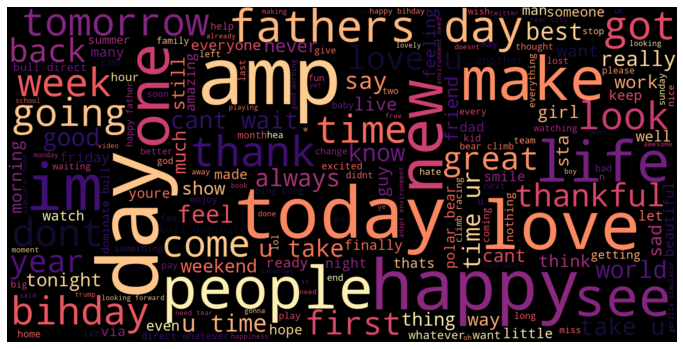

In [276]:
## Positive words
neg_tweets = df_train[df_train['label'] == 0]
neg_string = []
for t in neg_tweets.clean_tweet:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap="magma").generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

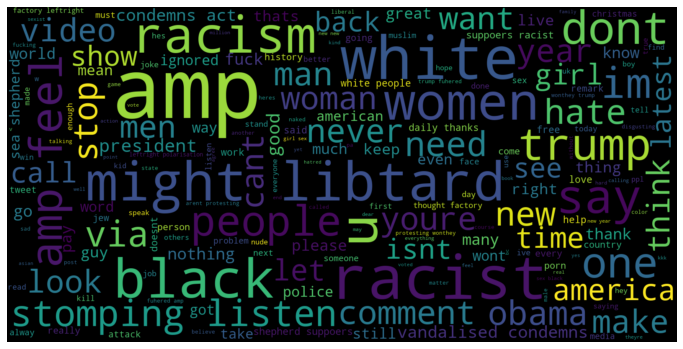

In [275]:
## Negative words
neg_tweets = df_train[df_train['label'] == 1]
neg_string = []
for t in neg_tweets.clean_tweet:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')
from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [278]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(df_train['clean_tweet'])

df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [279]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(df_train['clean_tweet'])

df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31958,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31959,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31960,0.0,0.0,0.0,0.0,0.0,0.528447,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [286]:
train_bow = bow[:31962]
#train_bow.todense()
train_tfidf_matrix = tfidf_matrix[:31962]
#train_tfidf_matrix.todense()

In [287]:
x_train_bow, x_valid_bow, y_train_bow, y_valid_bow = train_test_split(train_bow,df_train['label'],test_size=0.3,random_state=2)
x_train_tfidf, x_valid_tfidf, y_train_tfidf, y_valid_tfidf = train_test_split(train_bow,df_train['label'],test_size=0.3,random_state=17)

In [293]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')

Log_Reg.fit(x_train_bow,y_train_bow)
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.57612833e-01, 4.23871665e-02],
       [9.99399771e-01, 6.00229041e-04],
       [8.77923368e-01, 1.22076632e-01],
       ...,
       [9.69826867e-01, 3.01731325e-02],
       [9.65003284e-01, 3.49967156e-02],
       [9.24005923e-01, 7.59940774e-02]])

In [294]:


# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

# converting the results to integer type
prediction_int = prediction_int.astype(int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.4316279069767442

In [295]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[9.90338877e-01, 9.66112348e-03],
       [9.65631677e-01, 3.43683232e-02],
       [9.84967118e-01, 1.50328822e-02],
       ...,
       [9.60736071e-01, 3.92639287e-02],
       [9.77127151e-01, 2.28728491e-02],
       [9.99030687e-01, 9.69313409e-04]])

In [296]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

C:\Users\kants\AppData\Local\Temp/ipykernel_47492/276204132.py:5: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



0.45446182152713893